# Optimización de Parámetros - XGB

In [2]:
## Get current work directory to load all the custom modules
from pathlib import Path
import os
import sys
BASE_DIR = Path().absolute().resolve(strict=True).parent.parent.parent
if str(BASE_DIR) not in sys.path:
    sys.path.append(str(BASE_DIR))

In [3]:
DATA_PATH = os.path.join(BASE_DIR, 'data', 'gruas')
print(DATA_PATH)

/workspace/Externos/TimeSeries/BenchMark/data/gruas


In [4]:
import pandas as pd


In [5]:
import optuna
import datetime

In [8]:
from modulos.arima.gruas.general import format_timeseries, show_results_r2, arima_forecasting, total_forecasting, show_optimizer_results
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score


from modulos.LR.gruas.generals import make_lags

In [9]:
data = pd.read_csv(os.path.join(DATA_PATH, 'producto.csv'), parse_dates=['Periodo'])
data.head()

,idArticulo,ventas,DescProducto,Periodo
0,tuerc,7,TUERCA,2021-05-01
1,tuerc,5,TUERCA,2020-12-01
2,tuerc,1,TUERCA,2020-11-01
3,tuerc,11,TUERCA,2020-09-01
4,tuerc,4,TUERCA,2020-06-01


In [10]:
# Pivotando las tablas y llenando de ceros las ventas que no existen.
df_time = format_timeseries(data)
df_time.tail()

idArticulo,arandel,bateriascanrec,filtrodeair,filtrodepresio,filtroderetorn,pern,soport,tuerc
Periodo,,,,,,,,
2021-06-01,0.0,0.0,2.0,2.0,4.0,0.0,0.0,0.0
2021-07-01,0.0,1.0,2.0,2.0,2.0,0.0,1.0,0.0
2021-08-01,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2021-09-01,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
2021-10-01,0.0,1.0,2.0,2.0,1.0,0.0,0.0,0.0


## Baseline LR

In [11]:
   
idArticulo = 'filtrodeair'

ts = df_time[idArticulo].copy()

# Lag features
n_lags = 3
X = make_lags(ts, n_lags)
# Multistep targets
y = pd.DataFrame({
    'y': ts,
})

y, X = y.align(X, join='inner', axis=0)

data = pd.concat({'Targets': y, 'Features': X}, axis=1)

data.tail(10).style.set_properties(['Targets'], **{'background-color': 'green'}) \
                   .set_properties(['Features'], **{'background-color': 'magenta'})
    

In [12]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [13]:
model = XGBRegressor()


In [14]:
scores = cross_val_score(model, X, y, cv=10, scoring='r2')
print(f"Cross validation results r2: {scores.mean()} ")

Cross validation results r2: -0.3172071742830512 


In [15]:
model.fit(X, y)
y_fit = pd.DataFrame(model.predict(X), index=X.index, columns=y.columns)
#y_pred = pd.DataFrame(model.predict(X_test), index=X_test.index, columns=y.columns)

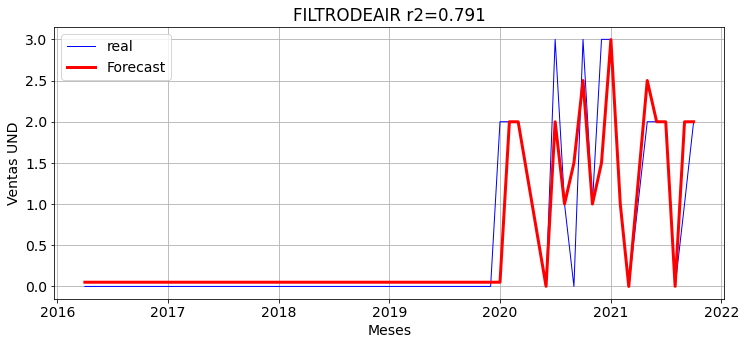

0.7912786309032056

In [17]:
show_results_r2(df_time, y_fit, idArticulo)
